In [7]:
#텍스트 마이닝은 텍스트를 분석해 명사 동사 조사를 구분한다.
#예를 들어 그걸 보고 이 글이 부정인지 긍정인지 아니면 보고 뭐가 중요한지 크롤링 결과를 한번더 가공하거나 이런 것이다.

#jpype의 버전이 파이썬 버전과 맞지 않는 오류가 있었음
#https://daewonyoon.tistory.com/386 를 참고해서 에러를 해결함
#특정 파이썬 버전과 특정 jpype 버전이 서로 호환이 되는 버전임에도 불구하고 오류가 발생하는 경우가 있다.
#이런 경우 다운그레이드된 버전을 새로 설치해 사용해보자.

#konlpy -> 형태소를 분석해주는 모듈
from konlpy.tag import Okt
from collections import Counter

#Twitter -> Okt 로 바뀌었다. 큰 상관은 없다. 나중에 따로 더 찾아보자.

twitter = Okt()
result = twitter.pos("안녕하세요? 텍스트 입니다.") # twitter.pos("") 안의 문자열에 대해서 형태소를 분석해주는 함수이다.
#print(result)

okt = Okt()
noun_list = okt.nouns("안녕 안녕 사람 사람 사과 사과 사과")
cnt = Counter(noun_list)
print(cnt)

#kkma , komoran 꼬마나 코모란이 성능이 좋다고 알려져 있다. 그런데 성능이 좋을 수록 속도가 느리다는
#단점이 존재한다. 결과를 빠르게 보고 싶다면 성능도 속도도 나쁘지 않은 Twitter 즉 Okt를 사용한다.
#한나눔 , 메캅 등등 다양한 konlpy 모듈을 사용할 수 있다.

#크롤링과 연계한다면 크롤링 한 자료에서 명사만 찾아온다던가 , 동사를 찾는다던가 할 수 있다.
#그런데 형태소를 분석하다보면 불용어가 보인다. 의미가 없는 용어를 불용어 라고 하는데 불용어들을 제거해야 한다.
#대부분 불용어는 한글자인 경우가 있으므로 단순하게 한글자인 것들만 다 지워도 되고 방법은 하기 나름이다.

#import collections 에서 Counter(형태소_list) 함수는 형태소_list 안에 들어있는 추출한 명사 , 동사 등등 형태소를 카운트해서
#어떤 단어가 가장 많이 나왔는지 출력해준다.

Counter({'사과': 3, '안녕': 2, '사람': 2})


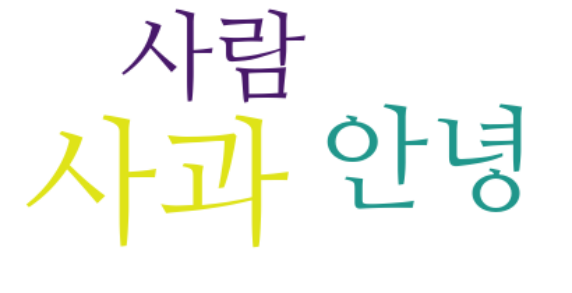

In [10]:
#텍스트 마이닝 - 단어 구름
import wordcloud
import matplotlib.pyplot as plt

# cnt는 위쪽에서 크롤링 혹은 어떤 글을 텍스트 마이닝을 거쳐 Counter(형태소_list) 의
#결과물을 이야기 한다.

cloud = wordcloud.WordCloud(font_path="./NanumMyeongjo.ttf" , background_color="white").generate_from_frequencies(cnt)
#단어의 빈도수에 따라서 단어의 크기를 만들어 준다.

plt.figure(figsize=(10,10)) # matplotlib 창 크기 설정
plt.imshow(cloud , interpolation="bilinear") # 창에 이미지를 띄우기 위해 사용 & 글자를 부드럽게 만듬
plt.axis("off")# 창의 축을 보이지 않게 한다.
plt.show() # 띄운 이미지를 보여줌

#띄운 이미지를 보니 아무것도 없다. 한글 폰트를 넣어서 한글이 나오도록 하자.
#한글 폰트는 위쪽의 wordcloud 쪽에 넣는다.
#배경색도 인자로 넣어서 바꾸어보자.

#정상적으로 단어 구름이 나오는 것을 볼 수 있다.

#응용하는 분야를 생각해보자면 어떤 키워드에 대해서 예를 들어 건강에 대해서 키워드
#크롤링을 진행하고 텍스트 마이닝을 했을 때 어깨 라는 단어가 크게 보인다. 그러면
#아 어깨가 안 좋아서 건강이 나쁜 사람들이 많구나 이런식으로 생각할 수 있는 것이다.

#만약 사각형 안이 아닌 어떤 실루엣 안에 단어를 넣고 싶다 하면 pillow 와 넘파이 모듈로 구현할 수 있다.
#위 처럼 구현해야할 상황이 생기면 두 모듈의 사용법을 살펴보자.

In [1]:
#텍스트 마이닝 - 네이버 영화 평 크롤링 / 감정 분석


#텍스트 마이닝 - 감정분석 함수
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import json
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


# best_model.h5 / wordIndex.json -> 사람들의 문장이나 감성을 학습한 모델들
#더 자세히 이런 알고리즘을 알고 싶으면 따로 공부가 필요함
#결론적으로 감성분석 함수는 감성을 분석해서 1에 가까울수록 긍정적 , 0에 가까울 수록 부정적으로 판단한다.

okt = Okt()
tokenizer = Tokenizer(19417, oov_token = 'OOV')
with open('wordIndex.json') as json_file: 
  word_index = json.load(json_file)
  tokenizer.word_index = word_index

loaded_model = load_model('best_model.h5')
def sentiment_predict(new_sentence):
    print(new_sentence)
    max_len = 30
    stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    return score


#네이버 영화 평을 크롤링 해주는 코드이다.
from bs4 import BeautifulSoup
import urllib.request as req

page_num = 1
previous_page_result = ""
while True:
    code = req.urlopen("https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=10106&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_num))
    soup = BeautifulSoup(code, "html.parser")
    comment = soup.select("li > div.score_reple > p > span")
    if comment[-1].text.strip() == previous_page_result:
        break
    for i in comment:
        i = i.text.strip()
        if i == "관람객":
            continue
        print(i)
        score = sentiment_predict(i) # 뽐아낸 문장들을 감정 분석 함수에 넣어준다.
        print(score)
        print("===========================")
    previous_page_result = i
    page_num += 1

#실행하면 감정분석을 진행하고 점수를 매겨주는 것을 볼 수 있다.
#점수에 따라 감정을 정리 한다면 점수가 0.8 이상이면 긍정 뭐 이런식으로 구분도 가능하다.
#감정 분석의 메인은 모델 부분인데 이 모델 부분에 대해서는 다양한 오픈소스도 존재하므로 다양한 모델들을 활용 가능하다.
#모델 부분을 설계하기 위해서는 딥러닝에 대한 공부가 더 필요하다.


절대로,그 어떠한 경우에도,칼라로 바꾸지 말야야 할,제일 첫번째 순위 영화
절대로,그 어떠한 경우에도,칼라로 바꾸지 말야야 할,제일 첫번째 순위 영화
0.4812408685684204
70년이 넘게 지난 이 영화는 지금봐도 지루하지 않으며 잉그리드버그만의 미모는 상상초월이다
70년이 넘게 지난 이 영화는 지금봐도 지루하지 않으며 잉그리드버그만의 미모는 상상초월이다
0.9872567653656006
멋진 대사들로 가득찬 영화. 이토록 모든 사람들이 사랑할만한 요소들만 고루 모아논 영화가 어디에 있을까.
멋진 대사들로 가득찬 영화. 이토록 모든 사람들이 사랑할만한 요소들만 고루 모아논 영화가 어디에 있을까.
0.6746876239776611
릭의 남자다움과 런드의 애절한 눈빛을 보면서 빠져든 영화 40년대 영화치고 카메라무브먼트와 편집기법이 괜찮았던영화 사랑하는 여인을 떠나보내고 얻는 우정의 소중함
릭의 남자다움과 런드의 애절한 눈빛을 보면서 빠져든 영화 40년대 영화치고 카메라무브먼트와 편집기법이 괜찮았던영화 사랑하는 여인을 떠나보내고 얻는 우정의 소중함
0.9949183464050293
빗물의 편지. 대포소리같은 심장박동등.. 등등. 명장면과 명대사가 많은 대단한 영화. 보가트의 카리스마는 대부의 마론 브란도에 필적한 수준이며. 버그만양은 로마의 휴일의 오드리헵번,바람과함께사라지다의 비비안리처럼 존...
빗물의 편지. 대포소리같은 심장박동등.. 등등. 명장면과 명대사가 많은 대단한 영화. 보가트의 카리스마는 대부의 마론 브란도에 필적한 수준이며. 버그만양은 로마의 휴일의 오드리헵번,바람과함께사라지다의 비비안리처럼 존...
0.8735770583152771
뭐 하나 빠짐이 없는 영화. 캐스팅 스토리 연출 불후의 음악 보가트의 멋진 트렌치코트 . 심지어 제목도 '카사블랑카'  낭만과 애수의 그 이름
뭐 하나 빠짐이 없는 영화. 캐스팅 스토리 연출 불후의 음악 보가트의 멋진 트렌치코트 . 심지어 제목도 '카사블랑카'  낭만과 애수의 그 이름
0.84800326824

0.9698944687843323
당신의 눈동자에 건배를~!
당신의 눈동자에 건배를~!
0.7126941084861755
기말고사 끝나고 전공수업시간에 나이지긋한 교수님이 자기가 정말 좋아하는 영화라고 보여주셨는데 첨에는 '뭔 이런 고전영화를..' 이라고 했다가 끝날 때 까지 말한마디 안 하고 푹 빠져서 감상함 ㅋㅋ 진짜...
기말고사 끝나고 전공수업시간에 나이지긋한 교수님이 자기가 정말 좋아하는 영화라고 보여주셨는데 첨에는 '뭔 이런 고전영화를..' 이라고 했다가 끝날 때 까지 말한마디 안 하고 푹 빠져서 감상함 ㅋㅋ 진짜...
0.49323564767837524
환상적이고 아름답다 음악마저도 클래식함
환상적이고 아름답다 음악마저도 클래식함
0.9825429916381836
아무도 프랑스 국가를 부르는 순간의 감동을 언급하지 않네요 ... 라 마르세예즈를 독일 국가에 대항하여 부르는 장면은 영화사에 길이 남을 순간이다
아무도 프랑스 국가를 부르는 순간의 감동을 언급하지 않네요 ... 라 마르세예즈를 독일 국가에 대항하여 부르는 장면은 영화사에 길이 남을 순간이다
0.987162709236145
능력 되는 남자의 순정, 혹은 허세. 그 시대의 영화를 보는 재미, 혹은 의미.
능력 되는 남자의 순정, 혹은 허세. 그 시대의 영화를 보는 재미, 혹은 의미.
0.3997938334941864
진짜 처음볼땐 전혀몰랐는데 다시보니 감동이 몰려온다. 1번이라도 꼭 다시보길 강추!
진짜 처음볼땐 전혀몰랐는데 다시보니 감동이 몰려온다. 1번이라도 꼭 다시보길 강추!
0.9940029382705688
내 인생 최고의 로맨스. 최고의 히로인. 안타깝게 어긋난 사랑이란 감정선과 넘쳐나는 명대사. 그래도 그 중 제일은 역시, '파리의 추억으로 남겠지.'...
내 인생 최고의 로맨스. 최고의 히로인. 안타깝게 어긋난 사랑이란 감정선과 넘쳐나는 명대사. 그래도 그 중 제일은 역시, '파리의 추억으로 남겠지.'...
0.9917730093002319
주인공에게 빠져들 수 밖에 없는 영화

0.9872353076934814
당시 시대상을 알고 보면 사랑보다 대의를 선택할 수 밖에 없는 지 알게 된 영화. 당시 시대를 알고 보면 더 좋은 영화.
당시 시대상을 알고 보면 사랑보다 대의를 선택할 수 밖에 없는 지 알게 된 영화. 당시 시대를 알고 보면 더 좋은 영화.
0.9828294515609741


0.45787811279296875
당신의 눈동자에 건배...
당신의 눈동자에 건배...
0.7126941084861755
멋지네. 옛날 영화의 느낌. 좋다
멋지네. 옛날 영화의 느낌. 좋다
0.9617519378662109
흑백에서 더 빛나는 눈동자와 그 눈빛에 매료됐다.
흑백에서 더 빛나는 눈동자와 그 눈빛에 매료됐다.
0.9460444450378418
개봉년도를 생각해보면, 명작 이라고 할 수 있을것 같다.
개봉년도를 생각해보면, 명작 이라고 할 수 있을것 같다.
0.8330597877502441
옛날 영화라고 믿어지지 않을만큼 호흡이 빠른점이 인상 깊었다. 약간은 설명적이지만 단역 배우들의 표정, 배경 등으로 대사가 아니라 장면으로 어떤 상황인지 전달하는 부분들도 세련되었다.
옛날 영화라고 믿어지지 않을만큼 호흡이 빠른점이 인상 깊었다. 약간은 설명적이지만 단역 배우들의 표정, 배경 등으로 대사가 아니라 장면으로 어떤 상황인지 전달하는 부분들도 세련되었다.
0.9685935378074646
한 여자한테 농락당하는 불쌍한 두 순정남 이야기. 명성에는 못미치지만 고전영화치고는 나름 잼나게 봄. 근데, 한참 2차 세계대전 중이었던 1942년에 이런 내용의 영화를 만들었다는게 새삼 놀랍네.
한 여자한테 농락당하는 불쌍한 두 순정남 이야기. 명성에는 못미치지만 고전영화치고는 나름 잼나게 봄. 근데, 한참 2차 세계대전 중이었던 1942년에 이런 내용의 영화를 만들었다는게 새삼 놀랍네.
0.9468480348587036
최고의 영화.
최고의 영화.
0.9546947479248047


0.45787811279296875
츤데레의 시조영화. 카메라 워크가 

멋있는 영화
멋있는 영화
0.9623987674713135
음악과 엔딩이 죽이는 영화.
음악과 엔딩이 죽이는 영화.
0.7854588031768799
세기의 명작
세기의 명작
0.9614424705505371
볼만했다. 하지만미국의선전영화한편본기분이드는건왜일까?
볼만했다. 하지만미국의선전영화한편본기분이드는건왜일까?
0.2220420241355896
마지막이 바로 이 영화의 묘미군. 새로운 우정의 시작.
마지막이 바로 이 영화의 묘미군. 새로운 우정의 시작.
0.9553506374359131
마지막의 험브리 보가트가 잊혀지지 않는다.
마지막의 험브리 보가트가 잊혀지지 않는다.
0.9740449786186218
남자들의 행복이란...
남자들의 행복이란...
0.922531008720398
as time goes by 최고다
as time goes by 최고다
0.9431411027908325
잉그리드 버그만을 만나게 한 영화...
잉그리드 버그만을 만나게 한 영화...
0.570865273475647
고전영화의 매력
고전영화의 매력
0.9087526798248291
전쟁중 카사블랑카에서의 사랑..잉그리드 버그만의 미모..
전쟁중 카사블랑카에서의 사랑..잉그리드 버그만의 미모..
0.9315816164016724
요즘 영양결핍에 시달리는 멜로 드라마는 한번 탐구해볼만 하다.
요즘 영양결핍에 시달리는 멜로 드라마는 한번 탐구해볼만 하다.
0.7066558599472046
정말 대단한 영화..특히 경찰서장?이란 캐릭터가 인상깊었다
정말 대단한 영화..특히 경찰서장?이란 캐릭터가 인상깊었다
0.9970022439956665
1942년작이면 아직 전쟁 중일텐데 그 때 영화를 만들었다니;
1942년작이면 아직 전쟁 중일텐데 그 때 영화를 만들었다니;
0.7105423212051392
편견을가지고보아서그런가, 멋진역활의남자배우들은빛난다.
편견을가지고보아서그런가, 멋진역활의남자배우들은빛난다.
0.883456289768219
최고의 영화~~ 40년대에 이런 영화가 있었다는건 정말

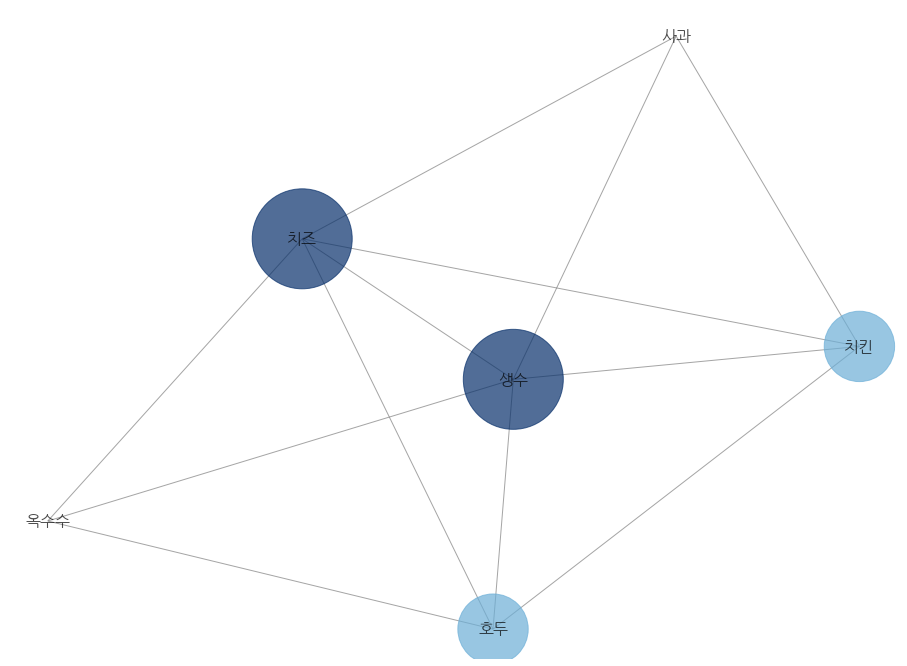

In [1]:
#텍스트 마이닝 - 연관 분석

#연관 분석이란 예를 들어 뉴스 기사 같은 곳에서 건강 이라는 단어와 음식 이라는 단어가
#얼마나 연관이 있는지 이런식으로 확인하는 것이다.

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

#연관 분석을 위해서 mlxtend 모듈을 불러온다.

#마트에 가서 다양한 사람들이 물건을 담았다고 가정하고 확인하자.
dataset = [
    ["사과", "치즈", "생수"],
    ["생수", "치킨" , "치즈", "호두"],
    ["사과", "치킨" , "치즈"],
    ["치즈", "호두" , "옥수수", "생수"]
]
te = TransactionEncoder()
te_transform = te.fit(dataset).transform(dataset)
#위의 데이터 셋을 가지고 연관분석을 하기 쉽게 데이터를 전처리 하는 과정이다.

df = pd.DataFrame(te_transform , columns=te.columns_)
#print(df)

#df 결과가 의미하는 것이 무엇이냐면 0번 즉 위의 dataset에서
#0번 사람의 장바구니에는 사과 , 생수 , 치즈가 True 즉 들어있다는 것을 의미하는 것이다.

#위의 데이터 셋을 변형하는 것을 인코더로 했다면 apriori 아프리오리 를 통해 연관분석을 진행한다.

df_apr = apriori(df, use_colnames=True , min_support=0.01)
#전처리된 데이터 셋을 apriori 함수에 넣어 연관분석을 진행한다.
#apriori의 디폴트는 support가 0.5를 넘어야 출력하도록 되어있다.
#이를 바꾸어 주려면 인자를 통해 min_support=0.xx 를 통해 최소 서포트 값을 잡아주자.

#print(df_apr)
#왼쪽에 보이는 서포트라는 수가 의미하는 것은 0.5다 그러면
#4명 사람중 2명은 사과를 들고 있으니까 1/2 즉 0.5라고 의미하는 것이다.
#치즈가 1.0 인 것을 보면 4명 모두 치즈를 들고있다는 것을 알 수 있다.
#(치즈 , 생수) 라면 함께 고른 사람의 퍼센테이지를 보는 것이다.

#해석에 있어서 보자면 만약 (사과 , 치즈) 가 1.0 이라고 보자. 
#그러면 이걸 해석해보자면 사과를 산사람은 무조건 치즈가 있고 
#치즈를 산사람은 무조건 사과를 산다는 의미로 해석이 가능하다.
#그러면 아 치즈와 사과는 연관이 있구나 이런식으로 볼 수도 있는 것이다.
#만약 치즈 호두가 0 이라면 아 치즈와 호두는 연관이 없구나 이런식으로 해석할 수 있다.

#즉 support 는 항목 사이의 연관성을 의미한다고 볼 수 있다.

#좀더 확장해서 뉴스 기사 연관분석으로 생각해보자.
#기사에 사용할 명사 단어들은 마트에서 고른 물건이라고 생각할 수 있다.
#그러면 이런 명사 단어들을 장바구니에 담긴 물건들로 생각해 연관분석을 위처럼 진행하는 것이다.

#뉴스 기사를 연관 분석하는 경우 (예시)
#뉴스 기사 크롤링 -> Okt나 꼬마 , 코모란 등 konlpy을 이용해 텍스트 마이닝으로
#명사만 따로 추출함 -> 추출한 명사들을 데이터 셋에 넣어주고 위처럼 연관분석 진행
#이후 나온 결과를 아래처럼 볼 수도 있고 따로 시각화 하여 분석

#연관분석의 시각화 => 연관성이 있는 키워드를 줄로 이어 표현
#키워드가 2개인 것들만 활용해서 표현하자.

df_apr["length"] = df_apr["itemsets"].str.len()
#데이터 프레임에 아이템셋의 수를 의미하는 열을 만들어 넣어주자.

df_result = df_apr[df_apr["length"] == 2]["itemsets"]
#이런식으로 length가 2인 열들만 itemset을 가져오도록 만들 수 있다.

#연관 분석 그래프 함수 이다.
#networkx 를 통해서 만든 연관 분석 그래프 함수이다.
def show_me_the_graph(df):
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    
    g = nx.Graph()
    g.add_edges_from(df)
    pr = nx.pagerank(g)
    nsize = np.array([v for v in pr.values()])
    nsize = 10000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
    pos = nx.kamada_kawai_layout(g)
    font_name = fm.FontProperties(fname="./NanumGothic.ttf").get_name()
    plt.figure(figsize=(16, 12))
    plt.axis("off")
    nx.draw_networkx(g, font_family=font_name, font_size=16,
                     pos=pos, node_color=list(pr.values()), edge_color='.5', node_size=nsize,
                     alpha=0.7, cmap=plt.cm.Blues)
    plt.show()

show_me_the_graph(df_result)